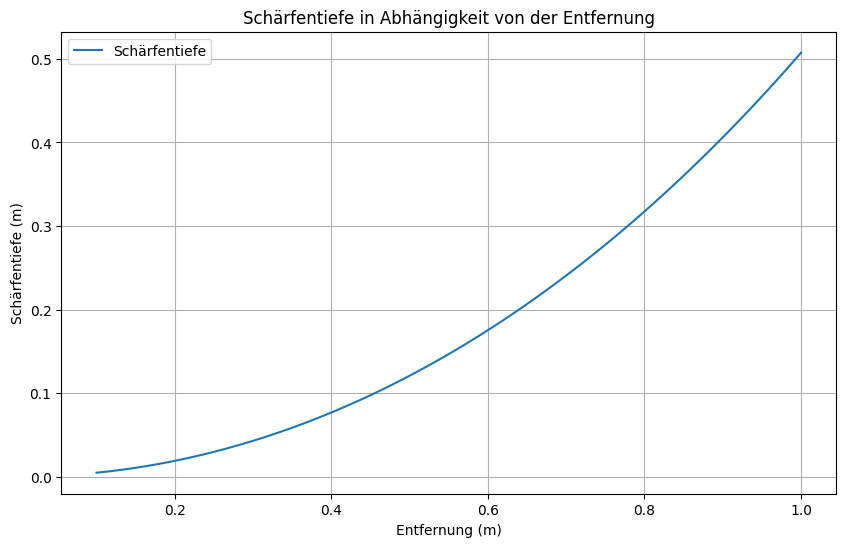

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Beispielwerte (müssen angepasst werden)
# a = 0.5  # Fokussierte Dingweite in Metern
k = 1.8    # Blendenzahl
f = 0.00474  # Brennweite in Metern
u_prime = 3e-6  # Unschärfekreis in Metern

# Entfernungen von 0 bis 1 Meter
distances = np.linspace(0.1, 0.4, 100)

# Schärfentiefe berechnen
K = k * (distances - f) * u_prime / f**2
a_v = distances / (1 + K)
a_h = distances / (1 - K)
t = a_h - a_v

# Plot
plt.figure(figsize=(10, 6))
plt.plot(distances, t, label='Schärfentiefe')
plt.xlabel('Entfernung (m)')
plt.ylabel('Schärfentiefe (m)')
plt.title('Schärfentiefe in Abhängigkeit von der Entfernung')
plt.legend()
plt.grid(True)
plt.savefig('schaerfentiefe_plot.png')  # Speichern als PNG
plt.show()